In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# Load train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [70]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
#Log transform the target
train["SalePrice"] = np.log1p(train["SalePrice"])

all_data = pd.get_dummies(all_data) #Get dummies
all_data = all_data.fillna(all_data.mean()) #Use mean value to fill Nulls

In [71]:
# Assign X_train, X_test, and y.
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [72]:
# Perform Lasso model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [73]:
rmse_cv(model_lasso).mean()

c:\users\skylar gao\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006952524728341403, tolerance: 9.111531734507367e-05
  tol, rng, random, positive)


0.012131490696006336

In [74]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [80]:
# Use Lasso to do feature selection
# Model Picked:
print(str(sum(coef != 0)))
# Model eliminated:
print(str(sum(coef == 0)))

35
253


In [81]:
# Select the most important features in the model
imp_features = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

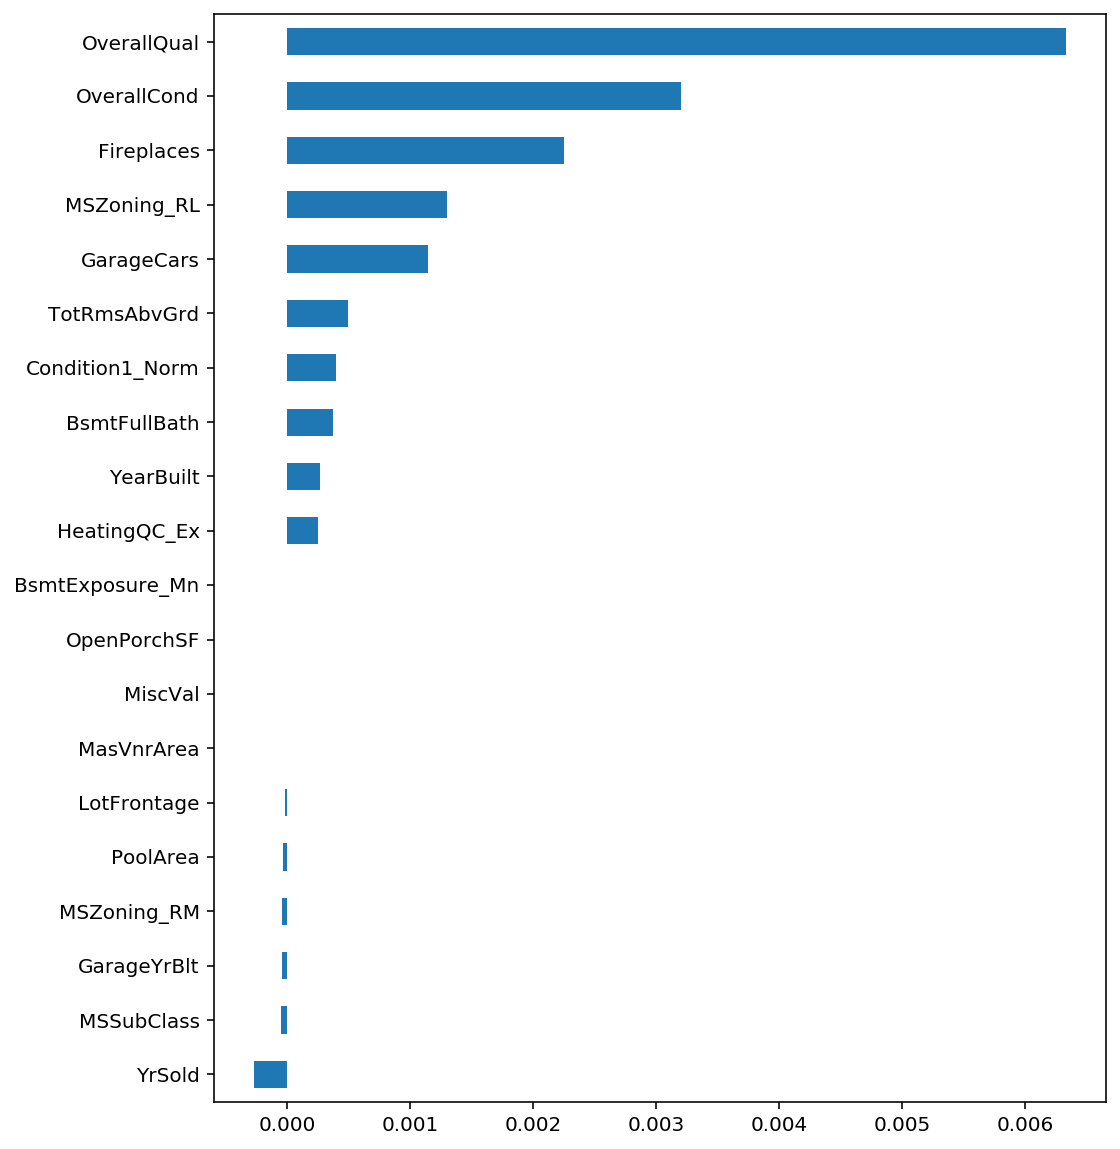

In [82]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_features.plot(kind = "barh")

In [90]:
# Modeling with different sets of features
from sklearn.model_selection import train_test_split
cols = ['OverallQual','GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = train[cols]
y = train['SalePrice']
train_X,test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [91]:
# Perform the second Lasso model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_lasso2 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [92]:
rmse_cv(model_lasso2).mean()
# It seems like the RMSE did not change with new feature group

c:\users\skylar gao\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006952524728341403, tolerance: 9.111531734507367e-05
  tol, rng, random, positive)


0.012131490696006336

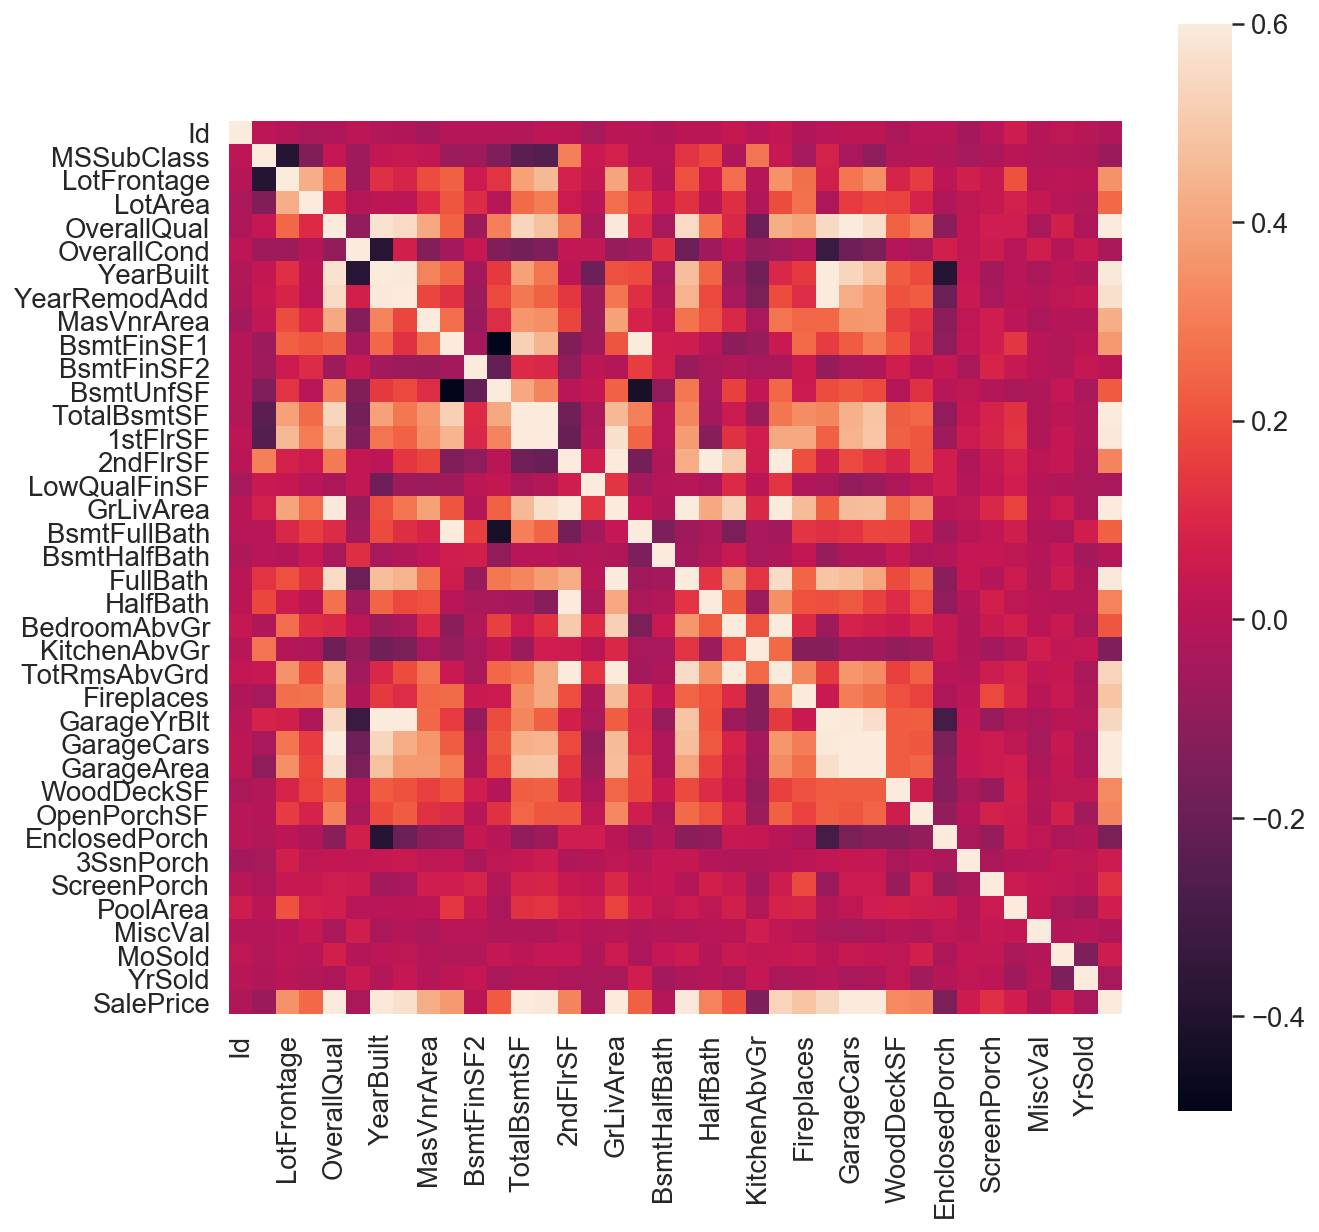

In [100]:
# Looking through correlations between variables using correlation matrix.
correlation_matrix = train.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlation_matrix, vmax=0.6, square=True)

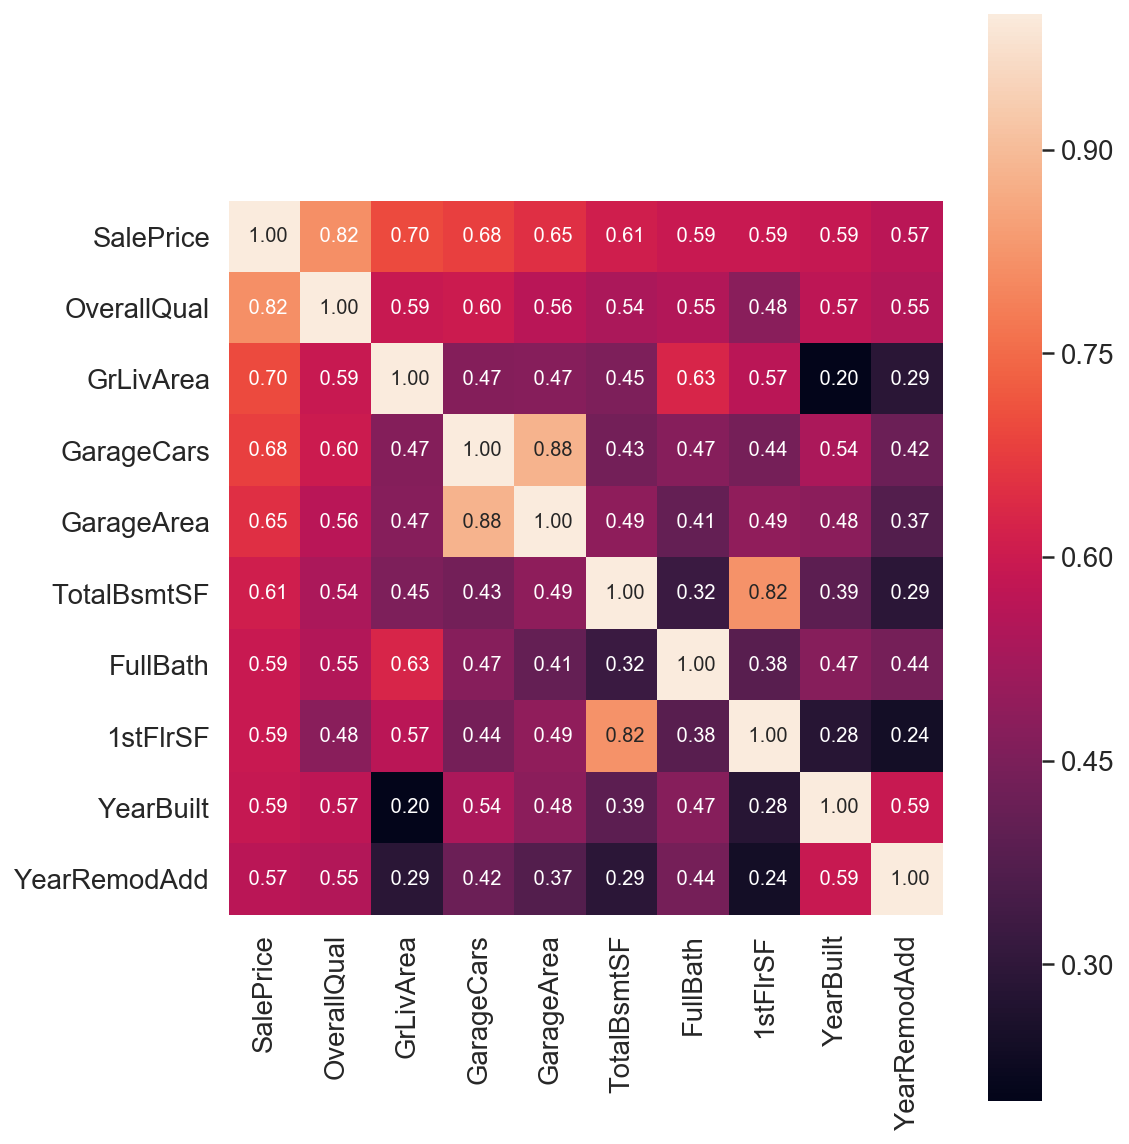

In [101]:
k = 10
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                square=True, fmt=' .2f', annot_kws={'size':10}, yticklabels
                =cols.values, xticklabels=cols.values)
plt.show()